In [1]:
path2data = "../data/interim/grasp/"

import glob
import os
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pylab as plt
import torch

def create_image_list():
    # Creating a list with all the image paths
    folders = range(1,11)
    folders = ['0'+str(i) if i<10 else '10' for i in folders]
    filenames = []
    for i in folders:
        for name in glob.glob(os.path.join(path2data, i, 'pcd'+i+'*r.png')):
            filenames.append(name)
    return filenames
            

def _process_bboxes(name):
    '''Create a list with the coordinates of the grasping rectangles. Every 
    element is either x or y of a vertex.'''
    with open(name, 'r') as f:
        bboxes = list(map(
              lambda coordinate: float(coordinate), f.read().strip().split()))
    return bboxes

def load_img_label(filename):    
    bbox = filename[:-5]+'cpos.txt'
    #bbox = filename[:-5]+'cneg.txt'
    bboxes = _process_bboxes(bbox)
    img = Image.open(filename)
    return img,bboxes

def show_img_label(img,label, thickness=2, size=100):  
    plt.figure(figsize=(size, size))
    # draw a plolygon
    draw = ImageDraw.Draw(img) 
    draw.polygon(label[-8:], outline="blue")    
    plt.imshow(np.asarray(img))

In [2]:
import torchvision.transforms.functional as TF
import torch

def resize_img_label(image,label,target_size=(256,256)):
    w_orig,h_orig = image.size   
    w_target,h_target = target_size
    
    # resize image and label
    image_new = TF.resize(image,target_size)
    for i in range(len(label)):
        x, y = label[i]
        label[i][0] = x/w_orig*w_target
        label[i][1] = y/h_orig*h_target           
    return image_new,label

def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])       
    image=TF.to_tensor(image)
    return image, label

filenames = create_image_list()

img, label = load_img_label(f1)
img_r,label_r=resize_img_label(img, torch.tensor(label).view(-1,2))
label_r = torch.squeeze(label_r.view(1,-1)).tolist()





In [15]:
import numpy as np

def get_image(filenames)
    for f in filenames:
        label_path = f[:-5]+'cpos.txt'
        label = _process_bboxes(label_path)
        label = np.array(label)
        label = label.reshape(-1,8)
        label_clean = []
        
        for box in label:
            if not np.isnan(box).any():
                label_clean.append(box.tolist())
                
        label_clean = np.array(label_clean).reshape(-1).tolist()   
        
    
    

[271.0, 281.0, 277.0, 305.0, 297.0, 300.0, 291.0, 276.0, 254.0, 278.556, 258.0, 306.0, 280.0, 303.0, 276.0, 275.556, 242.0, 274.708, 243.0, 304.0, 266.0, 303.0, 265.0, 273.708, 223.0, 279.78, 228.0, 307.0, 251.0, 303.0, 246.0, 275.78, 210.0, 286.225, 215.0, 307.0, 236.0, 302.0, 231.0, 281.225, 319.0, 298.805, 317.0, 273.0, 294.0, 275.0, 296.0, 300.805]


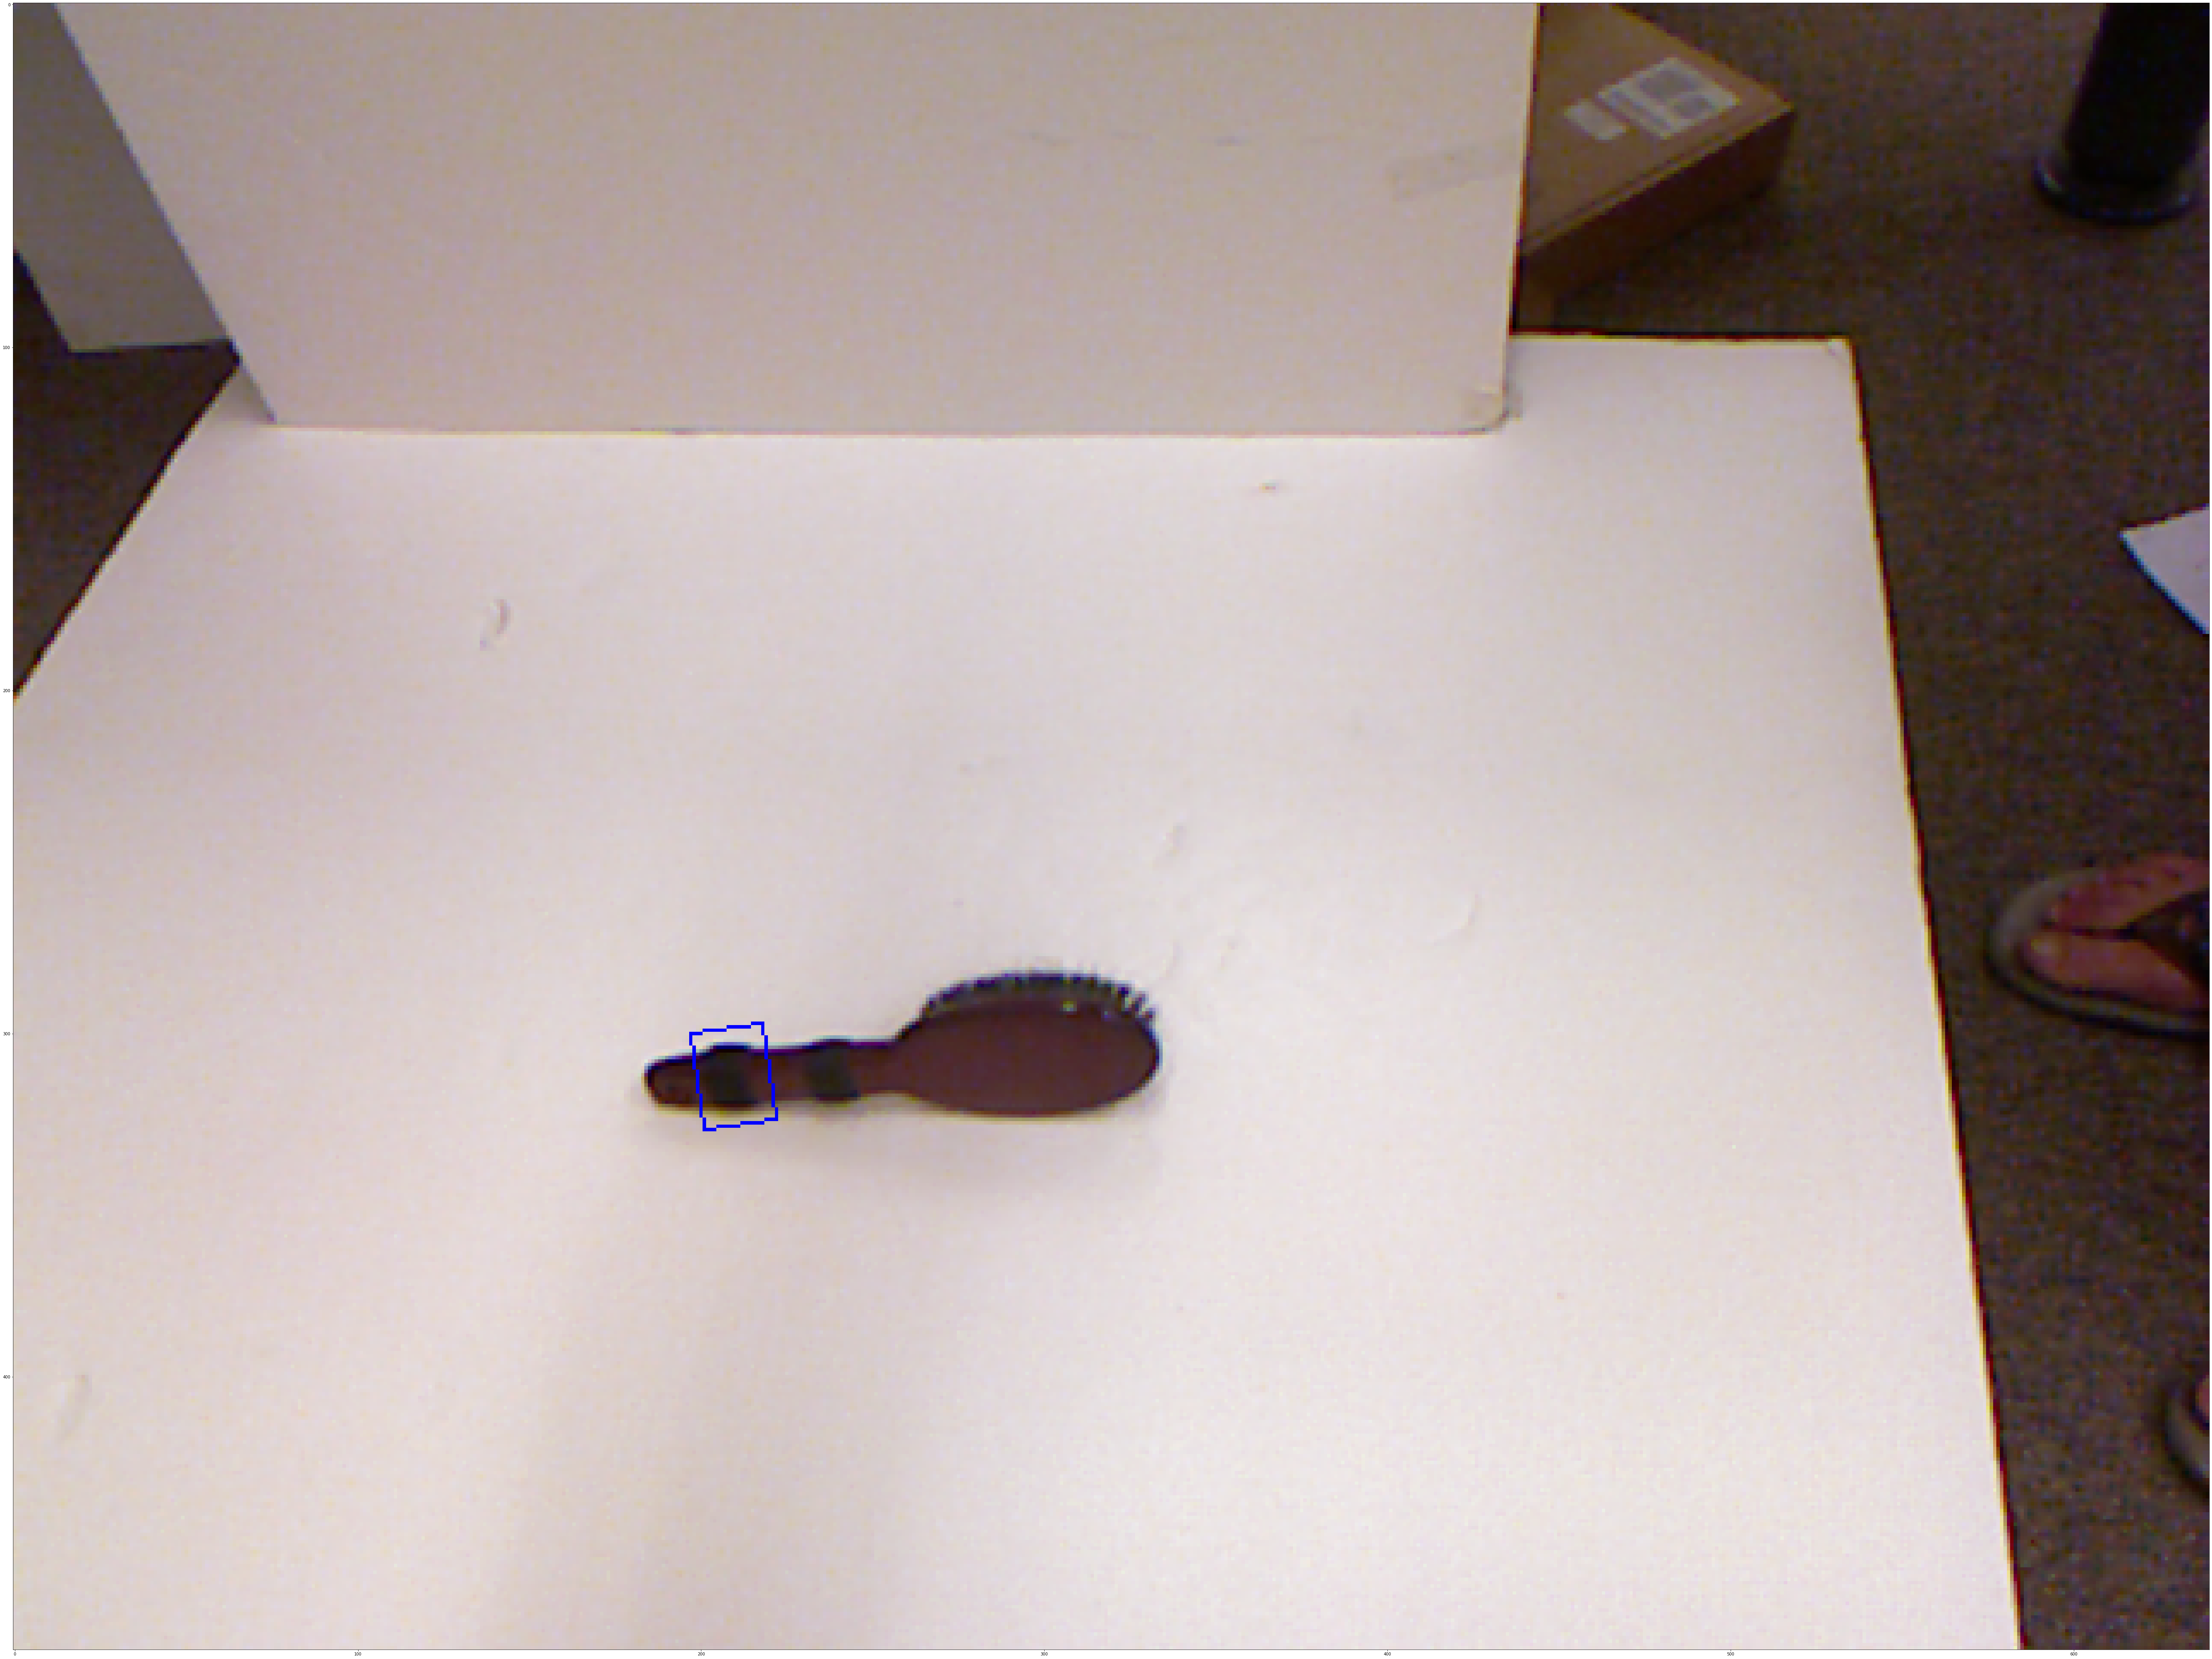

In [4]:
show_img_label(img, label)


In [5]:
import pandas as pd

df = pd.read_csv("../data/processed/grasp.csv")
df.head()

,path,label
0,/home/duc/grasp/grasp-pytorch/data/interim/gra...,"[271.0, 281.0, 277.0, 305.0, 297.0, 300.0, 291..."
1,/home/duc/grasp/grasp-pytorch/data/interim/gra...,"[274.0, 255.99, 271.0, 312.0, 291.0, 313.0, 29..."
2,/home/duc/grasp/grasp-pytorch/data/interim/gra...,"[308.0, 286.857, 302.0, 259.0, 325.0, 254.0, 3..."
3,/home/duc/grasp/grasp-pytorch/data/interim/gra...,"[244.0, 312.143, 281.0, 325.0, 289.0, 302.0, 2..."
4,/home/duc/grasp/grasp-pytorch/data/interim/gra...,"[237.0, 262.982, 234.0, 304.0, 264.0, 306.0, 2..."


In [6]:
df.shape

(885, 2)

In [9]:
label = df["label"]

In [10]:
type(label)

pandas.core.series.Series

In [20]:
x = label[0]

In [21]:
type(x)

str

In [22]:
x

'[271.0, 281.0, 277.0, 305.0, 297.0, 300.0, 291.0, 276.0, 254.0, 278.556, 258.0, 306.0, 280.0, 303.0, 276.0, 275.556, 242.0, 274.708, 243.0, 304.0, 266.0, 303.0, 265.0, 273.708, 223.0, 279.78, 228.0, 307.0, 251.0, 303.0, 246.0, 275.78, 210.0, 286.225, 215.0, 307.0, 236.0, 302.0, 231.0, 281.225, 319.0, 298.805, 317.0, 273.0, 294.0, 275.0, 296.0, 300.805]'

In [26]:
 y = eval(x)

In [27]:
type(y)

list

In [28]:
y[0]

271.0

In [29]:
type(y[0])

float

In [30]:
df.index

RangeIndex(start=0, stop=885, step=1)

In [32]:
df.columns

Index(['path', 'label'], dtype='object')

In [34]:
type(df["path"][0])

str

In [35]:
df.describe()

,path,label
count,885,885
unique,885,885
top,/home/duc/grasp/grasp-pytorch/data/interim/gra...,"[250.0, 258.5, 312.0, 196.5, 336.0, 221.0, 274..."
freq,1,1


In [43]:
df.iloc[2][0]

'/home/duc/grasp/grasp-pytorch/data/interim/grasp/01/pcd0187r.png'